In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from geoai.data.image import Image

In [3]:
from osgeo import gdal
from pathlib import Path

In [4]:
from geoai.data.human_settlements import create_clusters_from_building_footprints

/home/sandeep/miniconda3/envs/geoai/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [5]:
scene = Path('/home/sandeep/workspace/data/human-settlements/S2B_MSIL2A_20230518T050659_N0509_R019_T43PGQ_20230518T091909.SAFE')

In [6]:
ds = gdal.Open(f'{scene}/MTD_MSIL2A.xml')
ds_RGB = gdal.Open(ds.GetSubDatasets()[-1][0])
im = Image.from_gdal(ds_RGB)

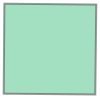

In [7]:
im.bbox_4326

In [8]:
gdf_cluster = create_clusters_from_building_footprints(Path('/home/sandeep/workspace/data/google-building-footprints'), im.bbox, im.crs)

Read files [PosixPath('/home/sandeep/workspace/data/google-building-footprints/v3/feather/3bb_buildings_29000000_30000000.feather'), PosixPath('/home/sandeep/workspace/data/google-building-footprints/v3/feather/3bb_buildings_23000000_24000000.feather'), PosixPath('/home/sandeep/workspace/data/google-building-footprints/v3/feather/3bb_buildings_38000000_39000000.feather'), PosixPath('/home/sandeep/workspace/data/google-building-footprints/v3/feather/3bb_buildings_3000000_4000000.feather'), PosixPath('/home/sandeep/workspace/data/google-building-footprints/v3/feather/3bb_buildings_20000000_21000000.feather'), PosixPath('/home/sandeep/workspace/data/google-building-footprints/v3/feather/3bb_buildings_6000000_7000000.feather'), PosixPath('/home/sandeep/workspace/data/google-building-footprints/v3/feather/3bb_buildings_22000000_23000000.feather'), PosixPath('/home/sandeep/workspace/data/google-building-footprints/v3/feather/3bb_buildings_26000000_27000000.feather'), PosixPath('/home/sandeep

Project
Buffer
Flatten out clusters


: 

: 

In [ ]:
gdf_cluster.head()

,geometry
2,"POLYGON ((257027.555 2192167.455, 257027.560 2..."
4,"POLYGON ((256624.256 2192786.587, 256624.215 2..."
25,"POLYGON ((254304.582 2194890.402, 254304.695 2..."
26,"POLYGON ((255011.742 2194526.224, 255012.578 2..."
30,"POLYGON ((255191.554 2193985.383, 255191.691 2..."


In [ ]:
gdf_cluster.to_feather(scene.with_suffix('.feather'))

In [ ]:
gdf_cluster.to_file(scene.with_suffix('.gpkg'))